# **Práctica 6: Diseño de Flitros Digitales**
### Andres Banquez- Melina Villada

### **1.OBJETIVOS**
*1.1 General*

Diseñar, aplicar y analizar filtros digitales en Python.

*1.2 Objetivos Específicos*

* Diseñar filtros digitales.
* Analizar los comandos de Python para aplicar filtros.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import pandas as pd
import seaborn as sns
import warnings
from funciones import mfreqz
warnings.filterwarnings('ignore')
#%matplotlib inline

Se tiene en cuenta que:

scipy.signal.firwin(orden+1, wn, pass_zero,windows)
Siendo wn la frecuencia de corte que la definiremos como F/Nyquist.

Nyquist = Fs/2

pass_zero es el tipo de filtro

la ventana es window, "hann"

aplico el filtro con signal.filtfilt(b = filtro, a = 1, x=y_e)

**4.1.** Creación de la señal

Proponga una secuencia sinusoidal 𝑥𝑒(𝑛), con 0 ≤ 𝑛 ≤ 1000 , 𝐹0 = 0,01𝐻𝑧 y 𝐹𝑠 = 25𝐻𝑧. Asuma que esta señal es una señal biológica, la cual se origina por algún proceso electrofisiológico, y que se registrará sobre la superficie de la piel mediante un sistema electrónico.

Text(0, 0.5, 'x_e(n)')

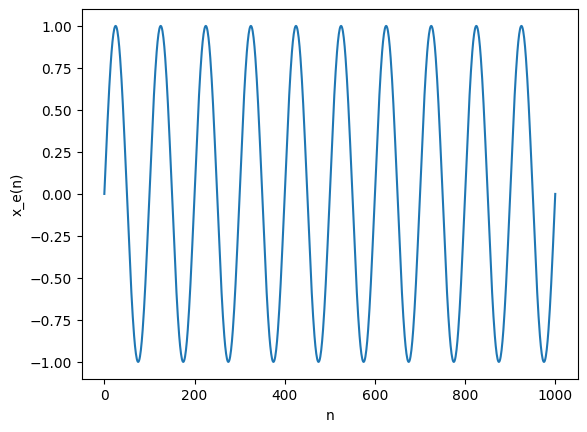

In [2]:
n = np.linspace(0, 1000, 1001)
F0 = 0.01
Fs = 25
def generateX(n, D):
  x_e = np.sin(2*np.pi*F0*(n - D))
  return x_e
x_e = generateX(n, 0)
plt.figure()
plt.plot(n, x_e)
plt.xlabel('n')
plt.ylabel('x_e(n)')

El viaje de la señal hipotética 𝑥𝑒(𝑛) a través de los diversos tejidos genera
una atenuación en la amplitud y un retraso temporal. El efecto del sistema electrónico de registro sobre la señal de interés es la adición de ruido gaussiano a la señal. La señal registrada finalmente es de la forma:

𝑦𝑒(𝑛) = 𝛼𝑥𝑒(n)(𝑛 − 𝐷) + 𝑤(n)

In [3]:
w = np.random.normal(0, np.sqrt(0.01), len(n))
x_e = generateX(n, 15)
y_e = 0.8*x_e + w

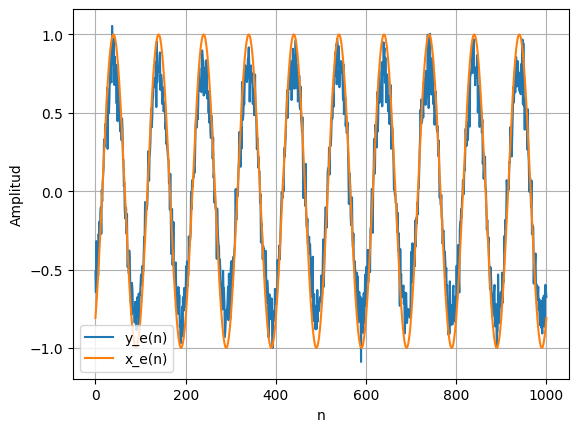

In [4]:
plt.figure()
plt.plot(n, y_e)
plt.plot(n, x_e)
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend(['y_e(n)', 'x_e(n)'])
plt.grid()
plt.show()

**4.2.** Diseño de un filtro

La función firwin permite diseñar un filtro FIR utilizando el método de ventanas, donde los principales argumentos de entrada son N: Orden del filtro y 𝑊𝑛: Frecuencia de corte. Para filtros digitales 𝑊𝑛 está normalizado entre 0 y 1, donde 1 es la frecuencia de Nyquist que es igual a la mitad de la frecuencia de muestreo de la señal. 𝑊𝑛 es igual a la frecuencia de corte del filtro dividido la frecuencia de Nyquist.

* Diseñe un filtro FIR pasa bajas para la señal 𝑦𝑒(𝑛), con una frecuencia de cortede 1.25 muestras/s y orden 30.


In [5]:
fc = 1.25
fs = 25
nyquist = fs/2

wn1 = fc/nyquist
orden = 30

In [6]:
lowpass = signal.firwin(orden+1, wn1, pass_zero = 'lowpass', window = 'hamming')

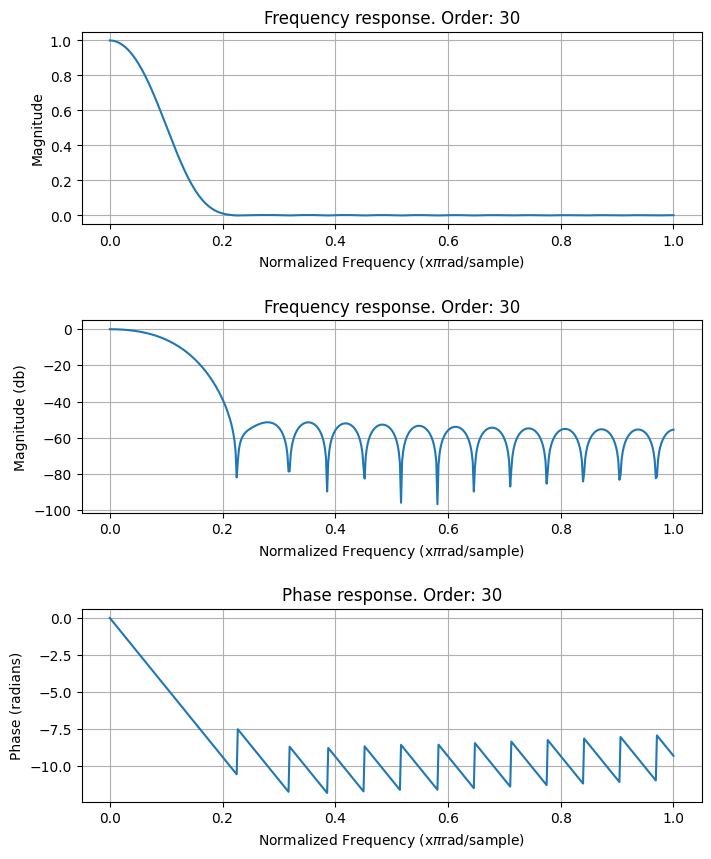

In [7]:
mfreqz(b = lowpass, a = 1, order = orden)

* ¿Qué cambios hay en los argumentos de la función para implementar un filtro
pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5
muestras/s.

Nota: Resultado esperado diseño de 3 filtros FIR (pasa bajas, pasa altas y pasa banda)


Se cambiaria el argumento pass_zero de lowpass a highpass para pasa altas y bandpass para pasabandas.

In [8]:
fc = 7.5

wn2 = fc/nyquist
orden = 30

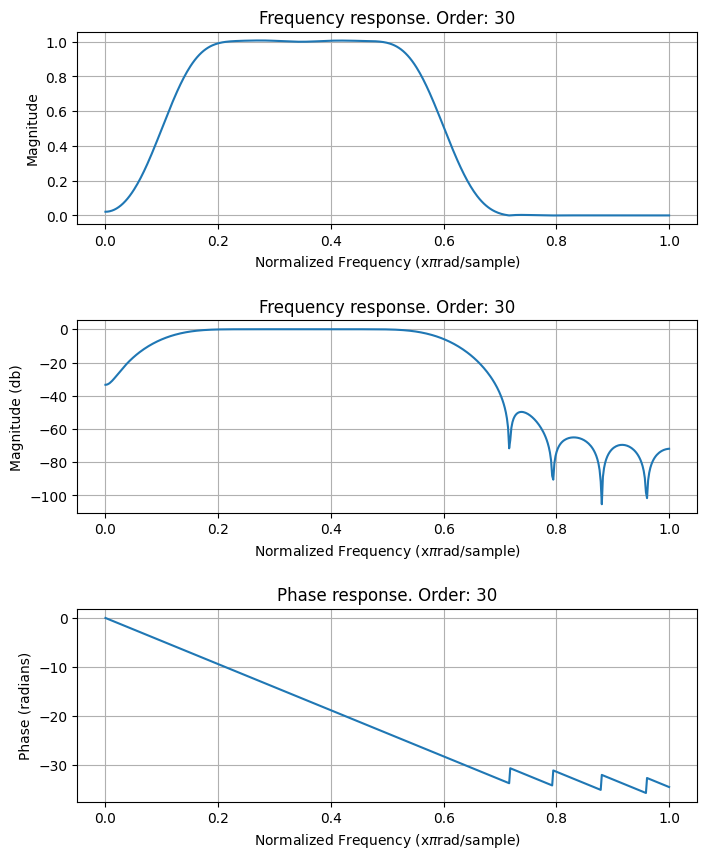

In [9]:
bandpass = signal.firwin(orden+1, [wn1, wn2], pass_zero = 'bandpass', window = 'hamming')
mfreqz(b = bandpass, a = 1, order = orden)

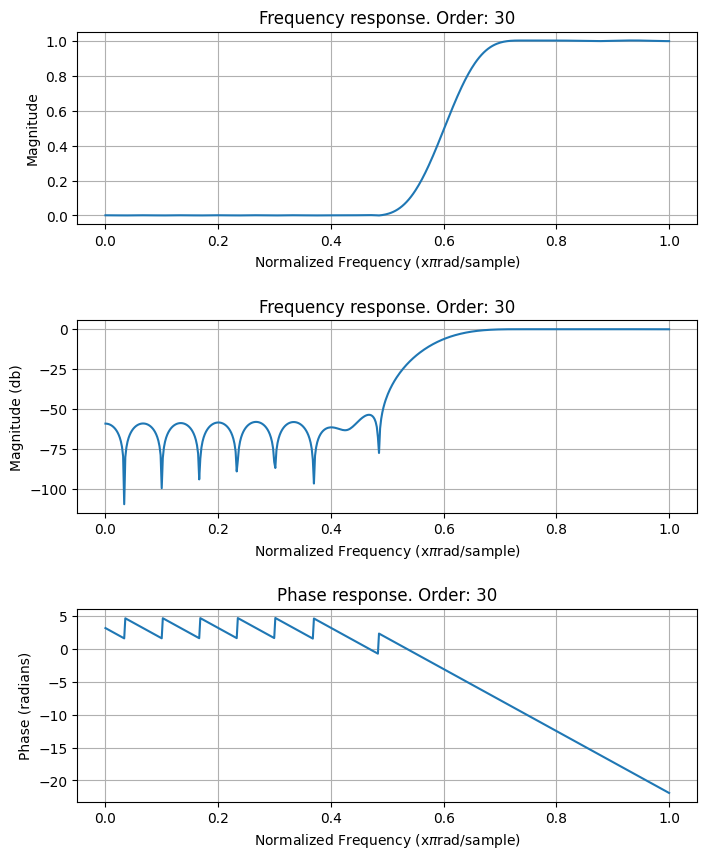

In [10]:
highpass = signal.firwin(orden+1, wn2, pass_zero = 'highpass', window = 'hamming')
mfreqz(b = highpass, a = 1, order = orden)

La función iirfilter permite diseñar un filtro IIR.

* Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare cambios.

Nota: Resultado esperado diseño de 3 filtros IIR (pasa bajas, pasa altas y pasa banda)

In [11]:
orden = 5 # Para los iir requieren un orden menor.

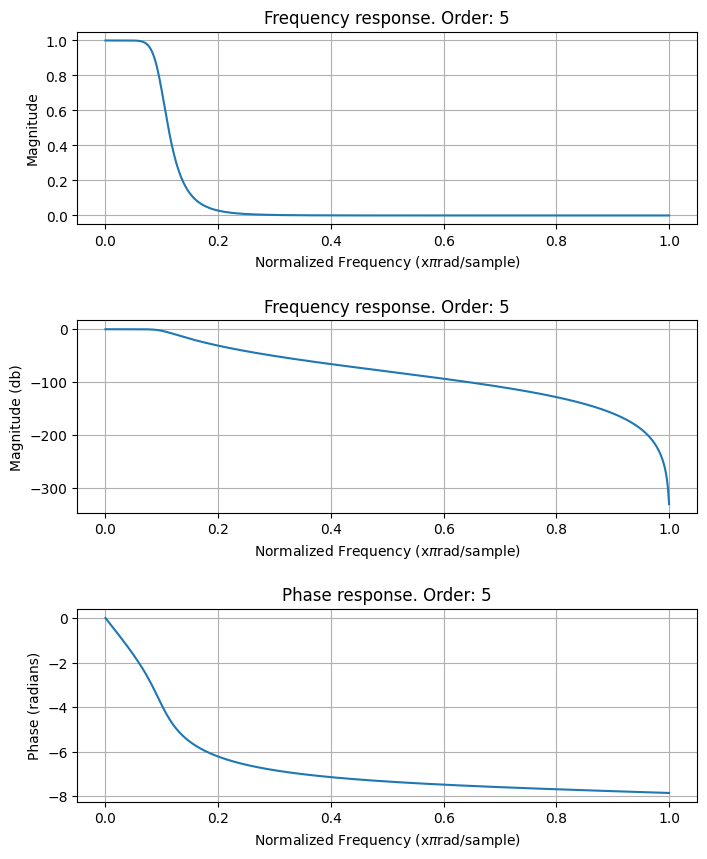

In [12]:
b, a = signal.iirfilter(orden, wn1, btype = 'lowpass')
mfreqz(b, a, order = orden)

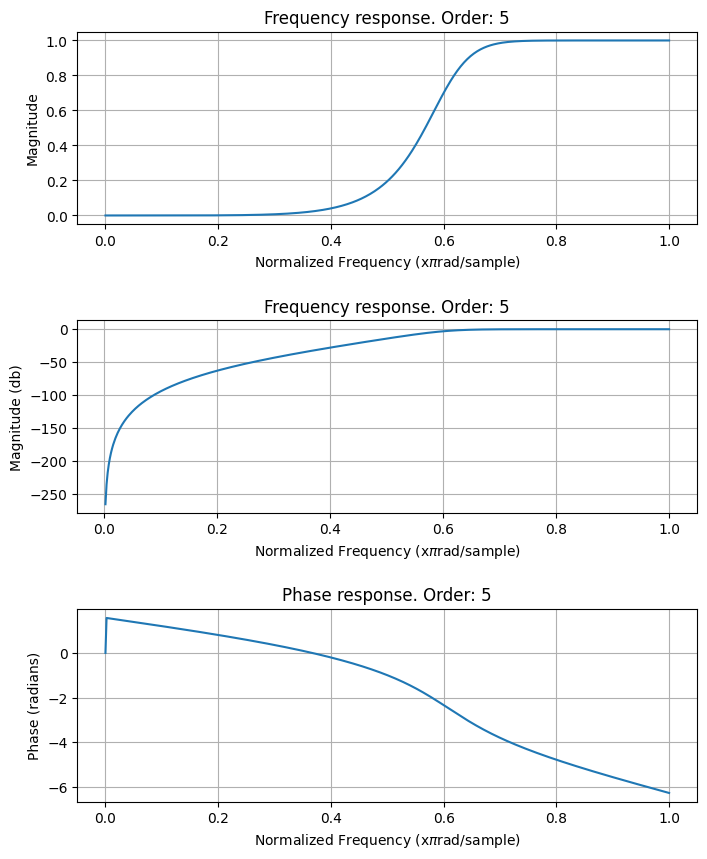

In [13]:
highpass_iir = signal.iirfilter(orden, wn2, btype = 'highpass')
mfreqz(highpass_iir[0], highpass_iir[1], order = orden)

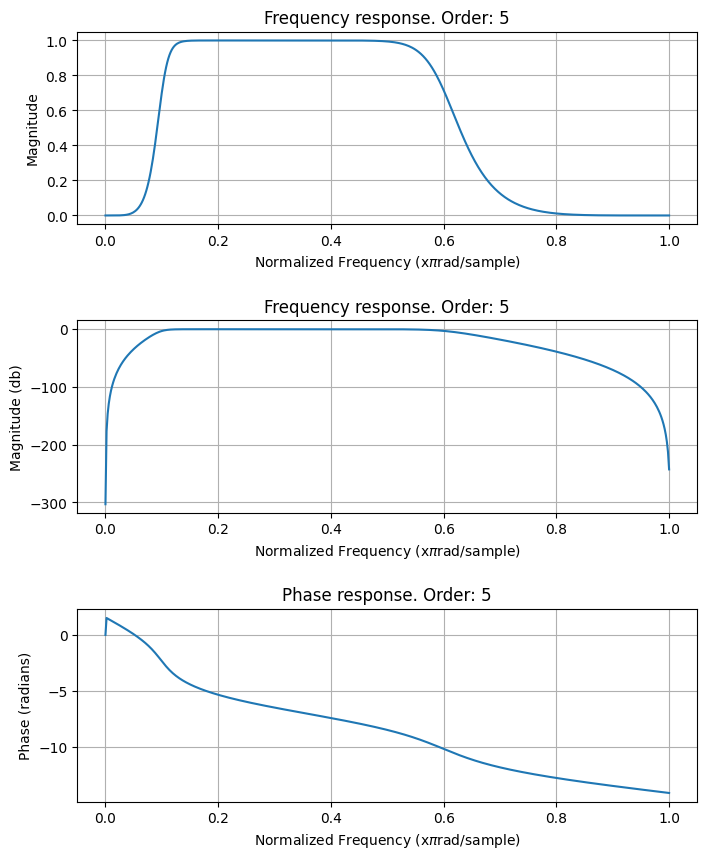

In [14]:
bandpass_iir = signal.iirfilter(orden, [wn1, wn2], btype = 'bandpass')
mfreqz(bandpass_iir[0], bandpass_iir[1], order = orden)

En un gráfico de respuesta al impulso, los filtros FIR muestran una respuesta que alcanza cero después de cierto número de muestras. La respuesta al impulso tiene una duración finita, es decir, se observa una secuencia de picos que luego se apagan. La respuesta en frecuencia de un filtro FIR generalmente es suave y presenta una transición gradual en la frecuencia de corte. Los filtros FIR permiten un diseño con fase lineal (sin distorsión de fase), lo cual se observa como una línea recta en la gráfica de fase.

En los filtros IIR, la respuesta al impulso tiende a extenderse indefinidamente, pues incluyen retroalimentación de sus propias salidas. Esto se ve como una señal de impulso inicial que disminuye, pero nunca llega a ser cero de manera absoluta (aunque puede aproximarse a cero). Los filtros IIR suelen tener una respuesta de frecuencia más aguda en la región de corte, alcanzando la atenuación deseada en menos muestras. Sin embargo, estos filtros pueden presentar una fase no lineal, que se observa como una curva no recta en la gráfica de fase, causando distorsión en la fase.

Al tener un orden más alto, el filtro FIR logra una fase lineal y una transición suave, lo cual es ideal para aplicaciones donde la fidelidad de fase es importante y donde se puede tolerar un mayor orden del filtro.
Filtro IIR (Orden 5): Aunque de menor orden, el filtro IIR ofrece una transición más abrupta entre la banda de paso y la de rechazo. Sin embargo, la distorsión de fase puede afectar la señal, por lo que es más adecuado para aplicaciones donde la fase no es crítica.

**4.3.** Filtrado
Las funciones lfilter y filtfilt filtran una secuencia de información 𝑥(𝑛) usando un filtro IIR o FIR.

* Pruebe dichos comandos utilizando la información entregada por el filtro pasa
bajas FIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia? ¿Es adecuado el orden del filtro usado? Analice.

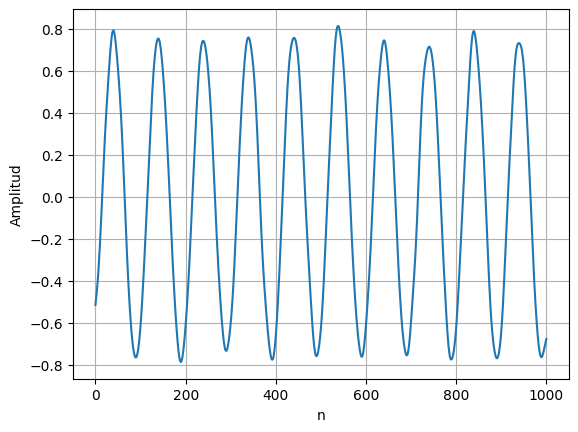

In [15]:
filtered_y = signal.filtfilt(b = lowpass, a = 1, x=y_e)
plt.figure()
plt.plot(n, filtered_y)
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

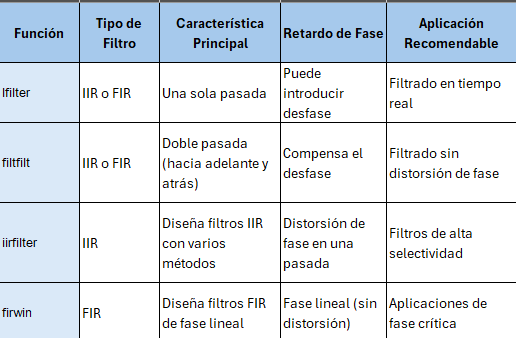

En el caso de los filtros FIR (Finite Impulse Response), sólo se utiliza el numerador porque no hay términos de retroalimentación en el diseño del filtro. Los filtros FIR son de respuesta finita, lo que significa que el resultado de cada muestra de la señal depende solo de las muestras actuales y pasadas de la señal de entrada, y no de la salida anterior del filtro. Por esta razón, sólo se necesitan coeficientes del numerador para definir la respuesta del filtro.

El numerador en un filtro FIR hace referencia a los coeficientes del filtro, que determinan cómo se ponderan las muestras de la señal de entrada para producir la señal de salida filtrada. Estos coeficientes (a menudo generados por funciones como firwin) definen la respuesta en frecuencia del filtro, estableciendo qué frecuencias se pasan y cuáles se atenúan.

lfilter, al aplicar el filtro en una sola pasada, puede introducir un desfase en la señal de salida, especialmente si se trata de un filtro de orden alto.
filtfilt, al realizar una doble pasada (hacia adelante y hacia atrás), compensa este desfase, resultando en una señal de salida que no presenta retardo de fase. Esta diferencia es importante en aplicaciones donde la integridad de fase de la señal es crucial.

Se tiene un orden adecuado para visualizar la señal correctamente

* Pruebe dichos comandos utilizando la información entregada por el filtro pasa
bajas IIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza el
numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal
caso hágalo y analice

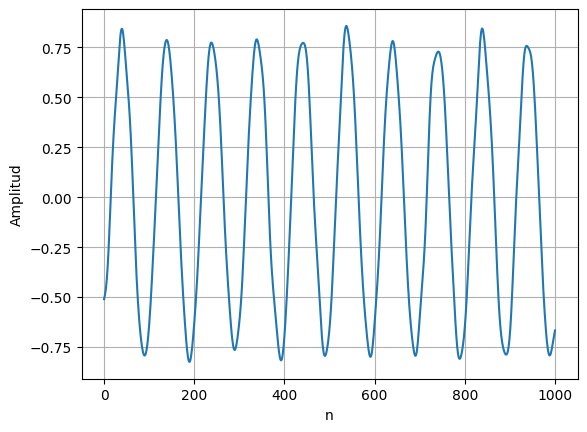

In [16]:
iir_y = signal.filtfilt(b = b, a = a, x=y_e)
plt.figure()
plt.plot(n, iir_y)
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

El numerador determina cómo se ponderan las muestras de la señal de entrada, mientras que el denominador define la retroalimentación de las muestras de salida anteriores. Este diseño permite que los filtros IIR tengan una respuesta infinita al impulso, lo cual los hace más eficientes en términos de selectividad de frecuencia y permite lograr una buena atenuación con un orden de filtro menor que el necesario en un filtro FIR.

**4.4** Aplicación
Cargue la señal señal_filtros.txt adquirida a una frecuencia de muestreo de 500 Hz. Extraiga y trabaje con el canal 1 de la señal.


In [20]:
file = pd.read_csv('senal_filtros.txt', sep = '\s+', header = None)
file.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-7.0306,-3.5899,-2.7995,-6.8884,0.9126,-6.7908,4.3411,6.5558,2.5295,-3.5293,-0.1973,-0.8435,0.7202,1.1319,1.3364,-7.3164
1,-7.0157,-3.5755,-2.7809,-6.8658,0.9288,-6.7672,4.3691,6.5822,2.5637,-3.5019,-0.1715,-0.8095,0.7518,1.1564,1.3747,-7.2797
2,-7.0426,-3.6058,-2.7972,-6.8852,0.9068,-6.7855,4.3449,6.5713,2.5465,-3.5271,-0.1917,-0.8273,0.7263,1.1290,1.3568,-7.2978
3,-7.0599,-3.6356,-2.8107,-6.8951,0.8900,-6.8084,4.3239,6.5683,2.5225,-3.5532,-0.2127,-0.8512,0.6976,1.0976,1.3305,-7.3204
4,-7.0538,-3.6399,-2.7953,-6.8751,0.9060,-6.7994,4.3398,6.5981,2.5667,-3.5144,-0.1691,-0.8081,0.7417,1.1319,1.3765,-7.2710


In [21]:
canal1 = file[0]
fs = 500
Ts = 1/fs

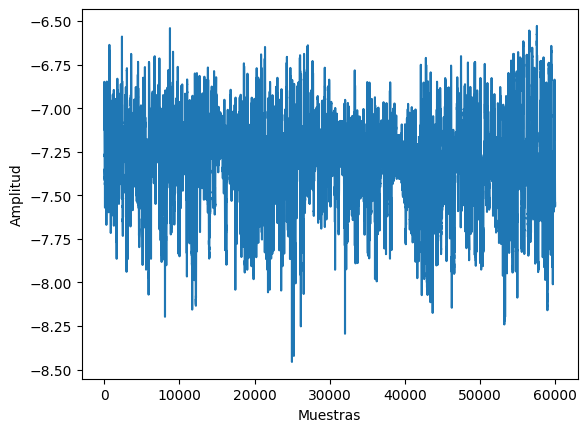

In [30]:
plt.figure()
plt.plot(canal1)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

* Realice un análisis frecuencial con la función que permite calcular el
periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice.

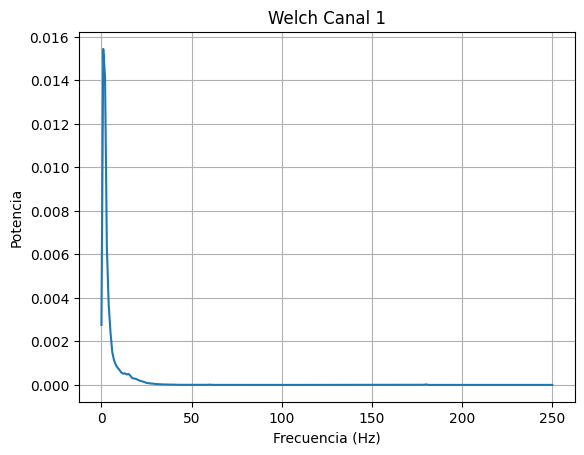

In [74]:
f, p = signal.welch(canal1.to_numpy(), fs, window='hann', nperseg=500, noverlap=50)
plt.figure()
plt.plot(f, p)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Welch Canal 1')
plt.grid()
plt.show()

El ruido electrico normalmente se encuentra en frecuencias cercanas a 60Hz, en este caso la mayor parte de la señal se encuentra en las frecuencias bajas, especialmente por debajo de 50Hz, por tanto, no se puede concluir que haya ruido eléctrico.

* Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios? Analice.

Debido a que este filtro para eliminar frecuencias de ruido electrico debe eliminar un grupo muy cerrado de frecuencias, se utiliza un orden alto, para evitar que el filtro elimine señales en otras frecuencias.

In [63]:
nyq = fs/2
fn = 60
bw = 3
lwn = (fn - bw/2) / nyq
hwn = (fn + bw/2) / nyq
orden = 500
notch = signal.firwin(orden + 1, [lwn, hwn], pass_zero = 'bandstop', window = 'hamming')

In [64]:
lwn, hwn

(0.234, 0.246)

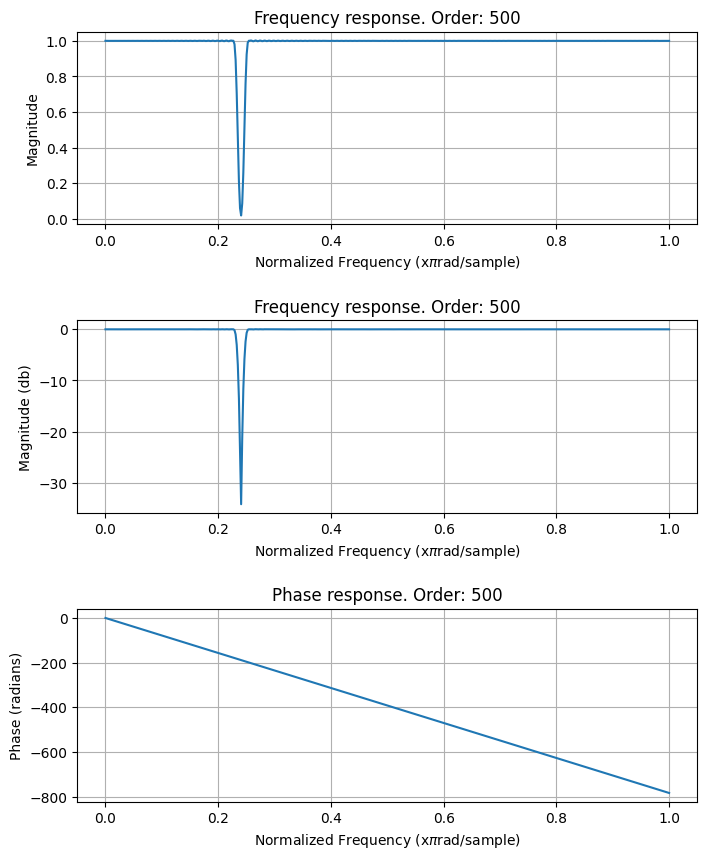

In [65]:
mfreqz(b = notch, a = 1, order = orden)

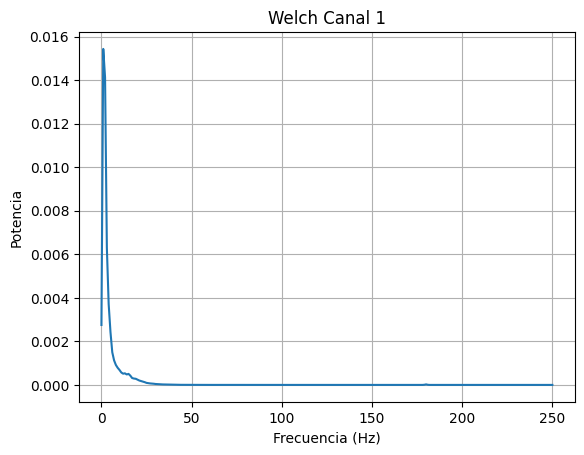

In [69]:
filtrado = signal.filtfilt(b = notch, a = 1, x=canal1.to_numpy())
ff, pf = signal.welch(filtrado, fs, window='hann', nperseg=500, noverlap=50)
plt.figure()
plt.plot(ff, pf)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Welch Canal 1')
plt.grid()
plt.show()

A primera vista parece que los datos realmente tienen poca o directamente nula diferencia antes y despues del filtrado, lo que podria decir sin hacer una comparación directa que realmente no habia ningun tipo de ruido electrico en la señal entregada.

* Grafique un segmento de las señales antes y después de filtrar, analice los cambios

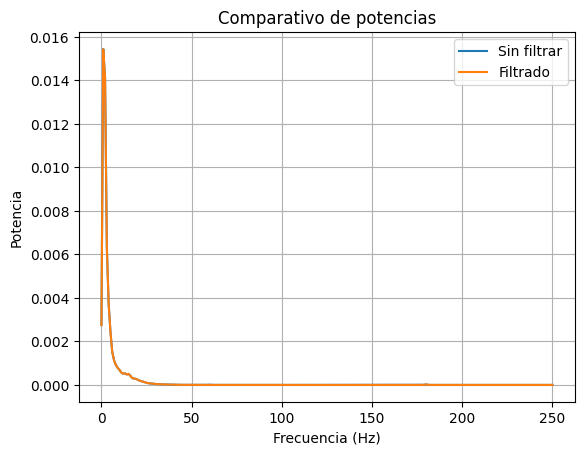

In [78]:
plt.figure()
plt.plot(f, p)
plt.plot(ff, pf)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.title('Comparativo de potencias')
plt.legend(['Sin filtrar', 'Filtrado'])
plt.grid()
plt.show()

Ahora si, al mirar las dos graficadas antes y despues realmente se nota que se solapan completamente, lo que confirma el analisis hecho antes de que no existe ningun ruido electrico incluido en la señal.

### **Conclusiones**

* Se demostró la capacidad de diseñar filtros FIR (Finite Impulse Response), IIR (Infinite Impulse Response) utilizando el método de ventanas en Python, específicamente con la función firwin e iirfilter de la biblioteca scipy.signal.Los filtros digitales diseñados lograron atenuar el ruido presente en las señales biológicas simuladas, mejorando así la calidad de las mismas.

* El preprocesamiento de señales mediante filtrado es crucial para eliminar el ruido y mejorar la interpretación de datos en aplicaciones electrofisiológicas.Los resultados obtenidos confirman que, al aplicar filtros adecuados, se puede obtener una representación más clara y precisa de las señales biológicas.

* Los filtros FIR presentan ventajas como la estabilidad y la linealidad de fase, lo que es crucial para aplicaciones donde la distorsión de fase puede ser problemática. El método de diseño de filtros FIR utilizando ventanas permite un control preciso sobre las características del filtro, adaptándose a las necesidades específicas de diferentes aplicaciones.

### **Bibliografía**

* el Ing. Guillermo Antonio Puente Romero, C. E. P. Á. A. P. (s/f). DISEÑO E IMPLEMENTACIÓN DE PRÁCTICAS PARA EL LABORATORIO DE COMUNICACIONES 4. Core.ac.uk. Recuperado el 30 de octubre de 2024, de https://core.ac.uk/download/pdf/35293511.pdf

* Ferro, H. F., Chamon, L. F. O., & Lopes, C. G. (2014). FIR–IIR adaptive filters hybrid combination. Electronics Letters, 50(7), 501–503. https://doi.org/10.1049/el.2014.0248

